<a href="https://colab.research.google.com/github/manthojunagachaitanya/statml-b40/blob/main/assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


df=pd.read_csv("/content/breast_cancer_survival.csv")
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [2]:
df.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [3]:
df.drop("Date_of_Last_Visit", axis=1, inplace=True)
df.head(2)


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Patient_Status
0,42,FEMALE,0.95256,2.1500,0.007972,-0.04834,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,Alive
1,54,FEMALE,0.00000,1.3802,-0.498030,-0.50732,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,Dead


In [4]:
mode_value = df['Patient_Status'].mode()[0]
df['Patient_Status'].fillna(mode_value, inplace=True)

<ipython-input-4-b9b1ea2736f2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Patient_Status'].fillna(mode_value, inplace=True)


In [5]:
df.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [6]:
!pip install pycaret

!pip install mlflow
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.0 MB/s eta 0:00:00
   ━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.3 MB/s eta 0:00:00


In [7]:
df.describe()


,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              334 non-null    int64  
 1   Gender           334 non-null    object 
 2   Protein1         334 non-null    float64
 3   Protein2         334 non-null    float64
 4   Protein3         334 non-null    float64
 5   Protein4         334 non-null    float64
 6   Tumour_Stage     334 non-null    object 
 7   Histology        334 non-null    object 
 8   ER status        334 non-null    object 
 9   PR status        334 non-null    object 
 10  HER2 status      334 non-null    object 
 11  Surgery_type     334 non-null    object 
 12  Date_of_Surgery  334 non-null    object 
 13  Patient_Status   334 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 36.7+ KB


In [9]:
from pycaret.classification import *


In [10]:
classification_experiment = setup(data=df, target='Patient_Status', session_id=42, log_experiment=True)


,Description,Value
0,Session id,42
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(334, 14)"
5,Transformed data shape,"(334, 21)"
6,Transformed train set shape,"(233, 21)"
7,Transformed test set shape,"(101, 21)"
8,Numeric features,5
9,Categorical features,8


2024/11/04 06:37:03 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.


In [11]:
best = classification_experiment.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8071,0.5784,0.8071,0.6652,0.7238,0.0355,0.0465,0.7330
dummy,Dummy Classifier,0.8027,0.5000,0.8027,0.6447,0.7150,0.0000,0.0000,0.2860
ridge,Ridge Classifier,0.7815,0.6207,0.7815,0.6536,0.7095,-0.0146,-0.0173,0.1580
knn,K Neighbors Classifier,0.7770,0.4960,0.7770,0.6835,0.7190,0.0307,0.0378,0.2080
rf,Random Forest Classifier,0.7692,0.6416,0.7692,0.7076,0.7321,0.0989,0.0966,0.3410
et,Extra Trees Classifier,0.7650,0.6408,0.7650,0.7068,0.7299,0.0928,0.0918,0.2860
xgboost,Extreme Gradient Boosting,0.7650,0.5879,0.7650,0.7065,0.7294,0.0958,0.0933,0.2120
lda,Linear Discriminant Analysis,0.7609,0.6345,0.7609,0.7227,0.7352,0.1186,0.1217,0.1580
gbc,Gradient Boosting Classifier,0.7520,0.6068,0.7520,0.7299,0.7373,0.1472,0.1464,0.2980
nb,Naive Bayes,0.7393,0.5553,0.7393,0.7178,0.7209,0.1044,0.1069,0.2690


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

2024/11/04 06:38:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/04 06:38:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/04 06:38:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/04 06:38:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/04 06:38:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/04 06:38:44 

In [12]:
# functional API
evaluate_model(best)

# OOP API
classification_experiment.evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

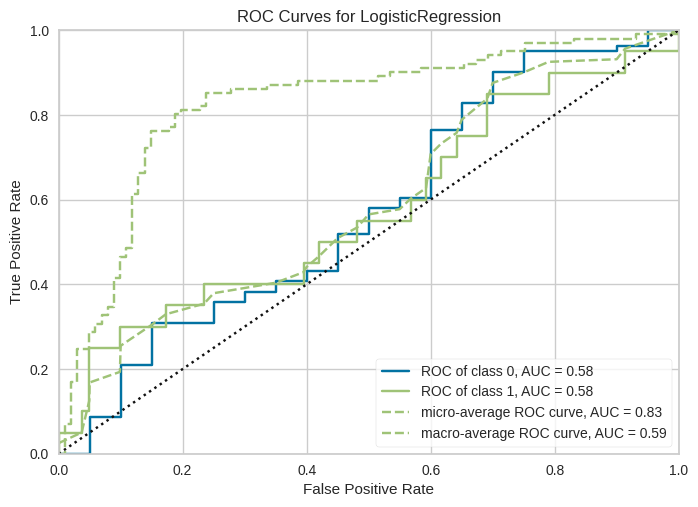

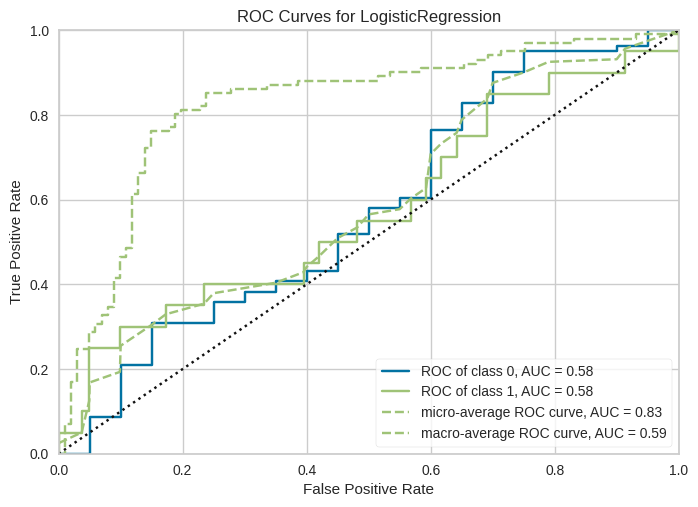

In [13]:
# functional API
plot_model(best, plot = 'auc')

# OOP API
classification_experiment.plot_model(best, plot = 'auc')


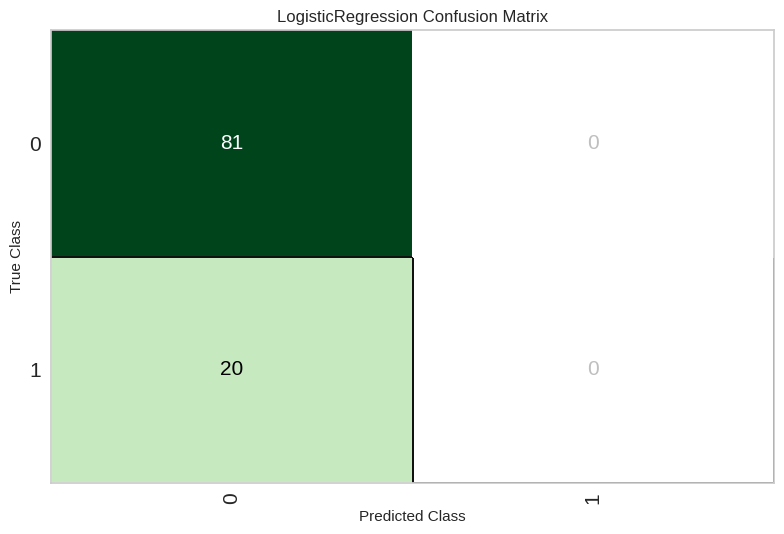

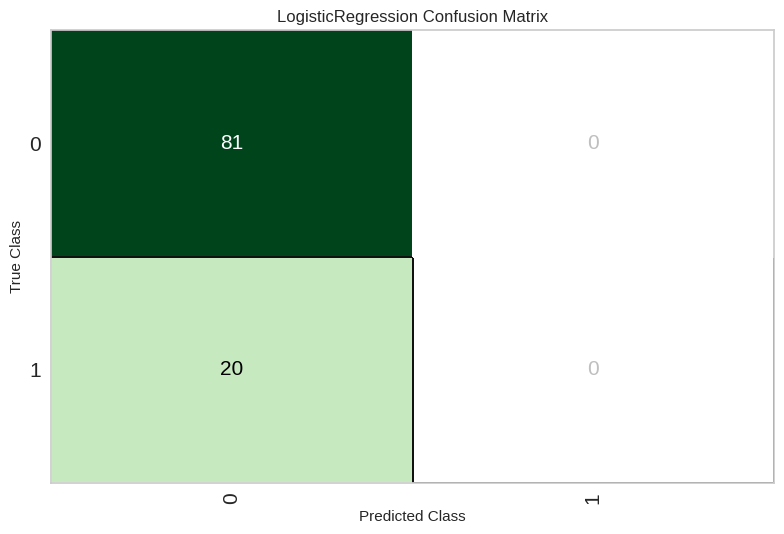

In [14]:
# functional API
plot_model(best, plot = 'confusion_matrix')

# OOP API
classification_experiment.plot_model(best, plot = 'confusion_matrix')

In [15]:
# functional API
predict_model(best)

# OOP API
classification_experiment.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8020,0.5753,0.8020,0.6432,0.7139,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8020,0.5753,0.8020,0.6432,0.7139,0.0000,0.0000


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Patient_Status,prediction_label,prediction_score
8,58,FEMALE,-1.268500,0.10613,1.13520,-0.394920,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,15-Jun-18,Alive,Alive,0.8028
124,85,FEMALE,0.403840,0.48825,0.84111,0.616450,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,26-May-18,Alive,Alive,0.7300
251,47,FEMALE,-0.525290,1.12240,0.43712,0.624100,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,11-Mar-18,Dead,Alive,0.8346
319,53,FEMALE,0.014106,-0.68397,0.53815,0.718970,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Aug-18,Alive,Alive,0.8326
272,67,FEMALE,0.317420,-0.55585,0.35657,0.797330,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,02-Oct-19,Alive,Alive,0.7600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,45,FEMALE,-0.278070,1.42910,-0.57895,0.222640,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,06-Mar-19,Dead,Alive,0.6705
139,36,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,Dead,Alive,0.6737
225,64,FEMALE,-0.969950,-0.76926,0.55680,-0.720150,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,03-Oct-18,Dead,Alive,0.8310
159,47,FEMALE,-0.198190,0.62597,-0.28137,-0.477740,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,10-Jul-19,Alive,Alive,0.7669


In [16]:
# functional API
save_model(best, 'my_best_pipeline')

# OOP API
classification_experiment.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
       